In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_df=pd.read_excel('flight_price_train.xlsx')

In [3]:
train_df.head()
train_df.shape

(10683, 11)

In [4]:
test_df=pd.read_excel('flight_price_test.xlsx')

In [5]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
df=train_df.append(test_df)

<ipython-input-6-0dc7144fae2c>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=train_df.append(test_df)


In [7]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [9]:
## feature engineering process
df['Date']=df.Date_of_Journey.str.split("/").str[0]
df['Month']=df.Date_of_Journey.str.split("/").str[1]
df['Year']=df.Date_of_Journey.str.split("/").str[2]

In [10]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [11]:
df['Date']=df['Date'].astype(int)
df['Month']=df['Month'].astype(int)
df['Year']=df['Year'].astype(int)

In [12]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [13]:
df.head(10)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019
5,SpiceJet,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0,24,6,2019
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0,12,3,2019
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270.0,1,3,2019
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087.0,12,3,2019
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625.0,27,5,2019


In [14]:
# using the apply with lambda is also a good way to do thr things ,dont worry u have done it earlier,with creating a custom function
df.Arrival_Time=df.Arrival_Time.apply(lambda x : str(x).split(" ")[0])

In [15]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [16]:
df.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
Date                  0
Month                 0
Year                  0
dtype: int64

In [17]:
# Extracting the hours and minutes
df['Arrival_hours']=df.Arrival_Time.str.split(":").str[0]
df['Arrival_minutes']=df.Arrival_Time.str.split(":").str[1]

In [18]:
df.drop('Arrival_Time',axis=1,inplace=True)

In [19]:
#changing the datatype
df.Arrival_hours=df.Arrival_hours.astype(int)
df.Arrival_minutes=df.Arrival_minutes.astype(int)

In [20]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hours,Arrival_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882.0,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35


In [21]:
# doint the same thing .i.e splitting for the departure time
df['Dep_hour']=df.Dep_Time.str.split(':').str[0]
df['Dep_min']=df.Dep_Time.str.split(':').str[1]

In [22]:
df.drop('Dep_Time',axis=1,inplace=True)

In [23]:
df.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hours,Arrival_minutes,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,9,6,2019,4,25,09,25


In [24]:
## changing the int type
df.Dep_hour=df.Dep_hour.astype(int)
df.Dep_min=df.Dep_min.astype(int)

In [25]:
df.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [26]:
df.Total_Stops.value_counts()

1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In [27]:
df.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [28]:
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,'nan':1})

In [29]:
df[df.Total_Stops.isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hours,Arrival_minutes,Dep_hour,Dep_min
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480.0,6,5,2019,9,25,9,45


In [30]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hours,Arrival_minutes,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50


In [31]:
df.drop('Route',axis=1,inplace=True)

In [32]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hours,Arrival_minutes,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50


In [33]:
df.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [34]:
df.Additional_Info.isnull().sum()

0

In [35]:
df[df.Duration=='5m']

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hours,Arrival_minutes,Dep_hour,Dep_min
6474,Air India,Mumbai,Hyderabad,5m,2.0,No info,17327.0,6,3,2019,16,55,16,50
2660,Air India,Mumbai,Hyderabad,5m,2.0,No info,NaN,12,3,2019,16,55,16,50


In [36]:
df.drop(6474,axis=0,inplace=True)
df.drop(2660,axis=0,inplace=True)

In [37]:
# converting the hours into minutes
min1=df.Duration.str.split(" ").str[0].str.split('h').str[0].astype(int)*60


In [38]:
# keeping the minutes part as it is
min2=df.Duration.str.split(" ").str[1].str.split('m').str[0].fillna(0).astype(int)

In [39]:
min1

0        120
1        420
2       1140
3        300
4        240
        ... 
2666    1380
2667     120
2668     360
2669     900
2670     840
Name: Duration, Length: 13351, dtype: int32

In [40]:
min2

0       50
1       25
2        0
3       25
4       45
        ..
2666    55
2667    35
2668    35
2669    15
2670    20
Name: Duration, Length: 13351, dtype: int32

In [41]:
df['Total_Time_in_min']=min1+min2

In [42]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hours,Arrival_minutes,Dep_hour,Dep_min,Total_Time_in_min
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20,170
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50,285


In [43]:
# # we will also keep the data of hours and minutes

##Hour

df['Duration_hour']=df.Duration.str.split(" ").str[0].str.split('h').str[0].astype(int)

In [44]:
## minutes
df['Duration_minutes']=df.Duration.str.split(" ").str[1].str.split('m').str[0].fillna(0).astype(int)

In [45]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hours,Arrival_minutes,Dep_hour,Dep_min,Total_Time_in_min,Duration_hour,Duration_minutes
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20,170,2,50
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50,445,7,25
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25,1140,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5,325,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50,285,4,45


In [46]:
# dropping the Duration column
df.drop('Duration',axis=1,inplace=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13351 entries, 0 to 2670
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Airline            13351 non-null  object 
 1   Source             13351 non-null  object 
 2   Destination        13351 non-null  object 
 3   Total_Stops        13350 non-null  float64
 4   Additional_Info    13351 non-null  object 
 5   Price              10681 non-null  float64
 6   Date               13351 non-null  int32  
 7   Month              13351 non-null  int32  
 8   Year               13351 non-null  int32  
 9   Arrival_hours      13351 non-null  int32  
 10  Arrival_minutes    13351 non-null  int32  
 11  Dep_hour           13351 non-null  int32  
 12  Dep_min            13351 non-null  int32  
 13  Total_Time_in_min  13351 non-null  int32  
 14  Duration_hour      13351 non-null  int32  
 15  Duration_minutes   13351 non-null  int32  
dtypes: float64(2), int32(10

In [48]:
## coming to the  airline
df.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [49]:
### for this we will use label encoding

"""                           LIMITATION

Label encoding converts the data in machine-readable form, but it assigns a unique number(starting from 0)
to each class of data. This may lead to the generation of priority issues in the training of data sets.\
A label with a high value may be considered
to have high priority than a label having a lower value."""

from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()


In [50]:
df.Airline=labelencoder.fit_transform(df.Airline)
df.Source=labelencoder.fit_transform(df.Source)
df.Destination=labelencoder.fit_transform(df.Destination)
df.Additional_Info=labelencoder.fit_transform(df.Additional_Info)

In [51]:
df.shape

(13351, 16)

In [52]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hours,Arrival_minutes,Dep_hour,Dep_min,Total_Time_in_min,Duration_hour,Duration_minutes
0,3,0,5,0.0,8,3897.0,24,3,2019,1,10,22,20,170,2,50
1,1,3,0,2.0,8,7662.0,1,5,2019,13,15,5,50,445,7,25
2,4,2,1,2.0,8,13882.0,9,6,2019,4,25,9,25,1140,19,0
3,3,3,0,1.0,8,6218.0,12,5,2019,23,30,18,5,325,5,25
4,3,0,5,1.0,8,13302.0,1,3,2019,21,35,16,50,285,4,45


In [53]:
df.Additional_Info.unique()

array([8, 5, 7, 1, 6, 0, 4, 3, 9, 2])

In [54]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()

In [55]:
df.head()


,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hours,Arrival_minutes,Dep_hour,Dep_min,Total_Time_in_min,Duration_hour,Duration_minutes
0,3,0,5,0.0,8,3897.0,24,3,2019,1,10,22,20,170,2,50
1,1,3,0,2.0,8,7662.0,1,5,2019,13,15,5,50,445,7,25
2,4,2,1,2.0,8,13882.0,9,6,2019,4,25,9,25,1140,19,0
3,3,3,0,1.0,8,6218.0,12,5,2019,23,30,18,5,325,5,25
4,3,0,5,1.0,8,13302.0,1,3,2019,21,35,16,50,285,4,45


In [56]:
df1=pd.get_dummies(df['Airline'])
df2=pd.get_dummies(df['Source'])
df3=pd.get_dummies(df['Destination'])
df4=pd.get_dummies(df['Additional_Info'])

In [57]:
df=pd.get_dummies(df,columns=['Airline','Source','Destination','Additional_Info'],drop_first=True)

In [74]:
TRAIN_DATA=df.iloc[:10680,:]
X=TRAIN_DATA.drop('Price',axis=1)
y=TRAIN_DATA['Price']


In [79]:
X.Total_Stops.fillna(1,inplace=True)

In [80]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
rnd=RandomForestRegressor()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [81]:
rnd.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
z

In [85]:
y_pred=rnd.predict(X_test)

In [86]:
from sklearn.metrics import r2_score

In [87]:
r2_score(y_test,y_pred)

0.8948122227077249

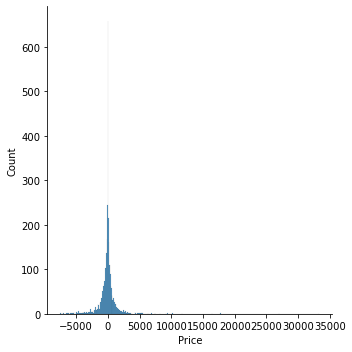

In [96]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(12,6)
sns.displot(y_test-y_pred)
plt.show()


In [97]:
from sklearn.linear_model import LinearRegression
lg=LinearRegression()
lg.fit(X_train,y_train)

LinearRegression()

In [99]:
y_pred=lg.predict(X_test)

In [100]:
r2_score(y_test,y_pred)

0.6920876458534412